In [ ]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from pandas import read_csv

# Homework 3

## No code was shared with any other party for this project.

## Q1: 
Create synthetic data and do curve fitting on it.

## Part A: 

[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
The initial a0 is:  3.5
Regression a_0 is: 3.8528396612599884
The original a1 is:  1.2
Regression a_1 is:  [1.21412947]


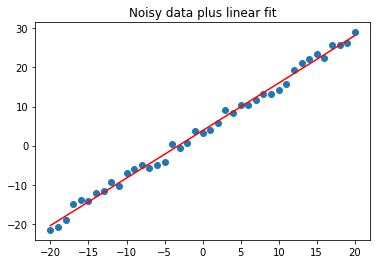

In [ ]:
# define x values
x_vec = np.linspace(-20,20,41)
print(x_vec)

# define function and coefficients
a0 = 3.5
a1 = 1.2
y_vec = a0 + a1*x_vec
y_orig = y_vec

# add noise 
noise = 4*(np.random.rand(y_vec.size)-0.5)  # (size=y_vec.size)
# print(noise) # look at the noise
y_vec = y_vec + noise
# print(y_vec) # look at the noisy data

plt.figure()
plt.scatter(x_vec,y_vec)
plt.title('Noisy data plus linear fit')

x_vec_reshaped = x_vec.reshape(len(x_vec),1)

# linear regression
curve = LinearRegression().fit(x_vec_reshaped, y_vec)
icept = curve.intercept_
coeff = curve.coef_
print('The initial a0 is: ', a0)
print('Regression a_0 is:', icept)

print('The original a1 is: ', a1)
print('Regression a_1 is: ', coeff)

y_curve = icept + coeff*x_vec
plt.plot(x_vec, y_curve, color='Red')



## Part B:

The initial a0 is:  11
Regression a_0 is:  9.749743930884726 

The initial a1 is:  0.85
Regression a_1 is:  0.871254865358462 

The initial a2 is:  0.3
Regression a_2 is:  0.300734540468536 



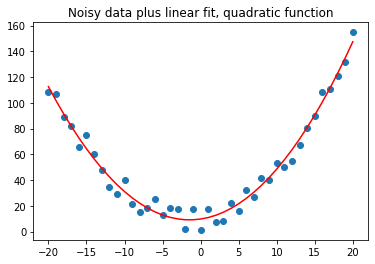

In [ ]:
# define coefficients and function
a0 = 11
a1 = 0.85
a2 = 0.3
y_quad = a0 + a1*x_vec + a2*(x_vec**2)

# add noise
noise = 20*(np.random.rand(y_quad.size)-0.5)  # (size=y_vec.size)
# print(noise) # look at the noise
y_quad = y_quad + noise
# print(y_vec) # look at the noisy data

# plot noisy data
plt.figure()
plt.scatter(x_vec,y_quad)
plt.title('Noisy data plus linear fit, quadratic function')

X=np.empty((len(x_vec),2))
X[:,0] = x_vec
X[:,1] = x_vec**2

# linear regression
curve = LinearRegression().fit(X, y_quad)
icept = curve.intercept_
coeff = curve.coef_

print('The initial a0 is: ', a0)
print('Regression a_0 is: ', icept, '\n')

print('The initial a1 is: ', a1)
print('Regression a_1 is: ', coeff[0], '\n')

print('The initial a2 is: ', a2)
print('Regression a_2 is: ', coeff[1], '\n')

# plot the fit curve
y_curve = icept + coeff[0]*x_vec + coeff[1]*x_vec**2
plt.plot(x_vec, y_curve, color='Red')

## Part C:

Regression a_0 is:  -0.06345867332606048
Regression a_1 is:  1.6724261817041
Regression a_2 is:  0.1409852633667768
Regression a_3 is:  0.10069415185836764


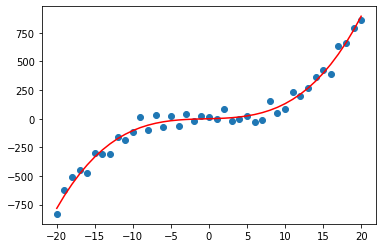

In [ ]:
filedata = loadmat('data.mat') # get data
x = filedata['x']
y = filedata['y']

plt.scatter(x,y) # this looks like a cubic function

# print(x) # similar x array to our other exercises

# convert to necessary shape
y_vec = y.reshape(41,1)
x_vec = x.reshape(41,1)

X=np.empty((41,3))
X[:,0] = x
X[:,1] = x**2
X[:,2] = x**3

# linear regression
curve = LinearRegression().fit(X, y_vec)
icept = curve.intercept_
coeff = curve.coef_
# print(coeff)
print('Regression a_0 is: ', icept[0])
print('Regression a_1 is: ', coeff[0,0])
print('Regression a_2 is: ', coeff[0,1])
print('Regression a_3 is: ', coeff[0,2])

# plot curve
y_curve = icept + coeff[0,0]*x_vec + coeff[0,1]*x_vec**2 + coeff[0,2]*x_vec**3
plt.plot(x_vec, y_curve, color='Red')

## Q2:
Using stress/strain data in CSV format.

$ s = K\epsilon^\eta $

Find K, $\eta$ for the stressstrain.csv dataset.

K= 1106.5310962588665
eta= 0.41346593618374666


Text(0, 0.5, 'Stress eta')

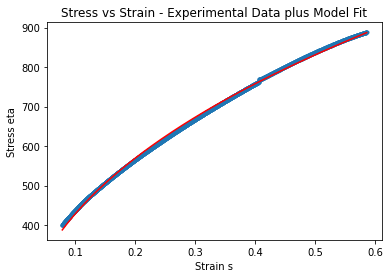

In [ ]:
T = genfromtxt('stressstrain.csv', delimiter=',') #get data
# print(T)

strain_e = T[:,0] 
stress_s = T[:,1]
# print(stress_s)

# basic data plot
plt.scatter(strain_e, stress_s, marker='.')
plt.title('Stress vs Strain - Experimental Data plus Model Fit')

# function to be fit
def stress(eps, k, eta):
  return k*(eps**eta)

# curve fit
pars, cov = curve_fit(f=stress, xdata=strain_e, ydata=stress_s, p0=[1., 1.1], bounds=(-np.inf, np.inf))

print('K=', pars[0])
print('eta=', pars[1])

# curve fit plot
plt.plot(strain_e,stress(strain_e,pars[0],pars[1]),color='red')
plt.xlabel('Strain s')
plt.ylabel('Stress eta')

## Q3:
Keeling curve dataset

A) Scatter plot of data

Text(0, 0.5, 'Atmospheric CO2')

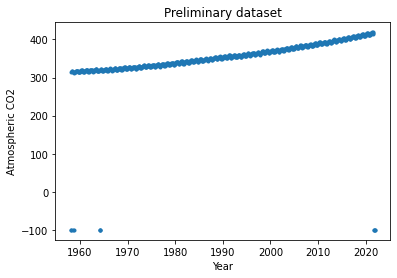

In [ ]:
dataframe = read_csv('Keeling-NH.csv', header=None)
data = dataframe.values
# choose the input and output variables
x,y = data[:,3],data[:,4]

# print(dataframe.head()) # look at the dataframe

plt.figure()
plt.scatter(x,y,marker='.') # preliminary look at the data, there are some outliers
plt.title('Preliminary dataset')
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2')

B) Clean the data to remove negative outliers

Text(0, 0.5, 'Atmospheric CO2')

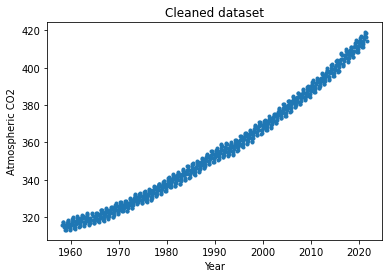

In [ ]:
dataframe_clean = dataframe[dataframe[4]>0] #conditional select from dataframe where column 4 value is positive
data_clean = dataframe_clean.values
# choose the input and output variables
xc,yc = data_clean[:,3],data_clean[:,4]

plt.figure() # plotting cleaned dataset
plt.scatter(xc,yc, marker='.')
plt.title('Cleaned dataset')
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2')

C) Scatter plot of $x_c, y_c$ with y axis limits [300,450].

Text(0, 0.5, 'Atmospheric CO2')

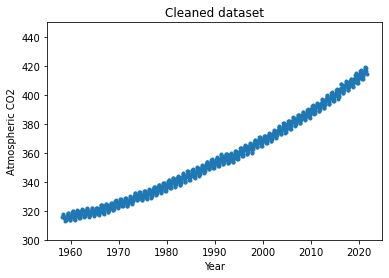

In [ ]:
plt.figure() # plotting cleaned dataset with given limits
plt.scatter(xc,yc, marker='.') 
plt.title('Cleaned dataset')
plt.ylim(300,450)
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2')

D) Scatter plot of $x_c, y_c$ with y axis limits [380,420] and x axis limits [2015, 2020].

Text(0, 0.5, 'Atmospheric CO2')

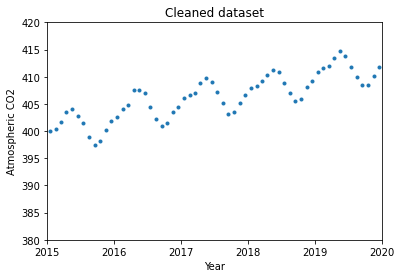

In [ ]:
plt.figure() # plotting cleaned dataset with given years and limits
plt.scatter(xc,yc, marker='.') 
plt.title('Cleaned dataset')
plt.ylim(380,420)
plt.xlim(2015,2020)
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2')

E) Fit a curve through $x_c, y_c$ to capture general trend plus seasonal variation. Try models:
$$ y_c = a_0 + a_1 x_c $$
$$ y_c = a_0 + a_1 x_c + a_2 x_c^2 $$
$$ y_c = a_0 + a_1 x_c + a_2 x_c^2 + a_3 \sin(a_4 - x_c) $$

F) Plot the results of the fitted models on the scatter plot.

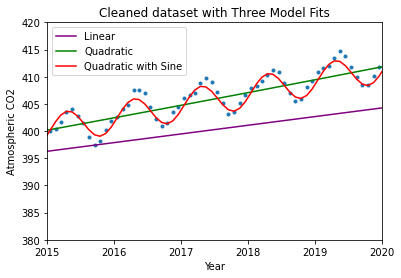

In [ ]:
def linfunc(x, a0, a1):
  return a0 + a1*x

def quadfunc(x, a0, a1, a2):
  return a0 + a1*x + a2*x**2

def quadsine(x, a0, a1, a2, a3, a4, a5):
  return a0 + a1*x + a2*x**2 + a3*np.sin(a4-a5*x)
  # modified from the prompt to include a coefficient on x as per discussion on Slack 

# curve fitting the dataset using the three given models
linpars, lincov = curve_fit(f=linfunc, xdata=xc, ydata=yc, p0=[1,1], bounds=(-np.inf, np.inf))
quadpars, quadcov = curve_fit(f=quadfunc, xdata=xc, ydata=yc, p0=[1,1,1], bounds=(-np.inf, np.inf))
qsinpars, qsincov = curve_fit(f=quadsine, xdata=xc, ydata=yc, p0=[1,1,1,1,1,2*np.pi], bounds=(-np.inf, np.inf))

# copy of last scatter plot to show with curves
plt.figure() # plotting cleaned dataset with given years and limits
plt.scatter(xc,yc, marker='.') 
plt.title('Cleaned dataset with Three Model Fits')
plt.ylim(380,420)
plt.xlim(2015,2020)
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2')
plt.plot(xc, linfunc(xc,*linpars),color='purple', label='Linear')
plt.plot(xc, quadfunc(xc, *quadpars), color='green', label='Quadratic')
plt.plot(xc, quadsine(xc, *qsinpars), color='red', label='Quadratic with Sine')
plt.legend()

G) Based on the fitted models, predict the atmospheric $CO_2$ concentrations from 2020 to 2025.

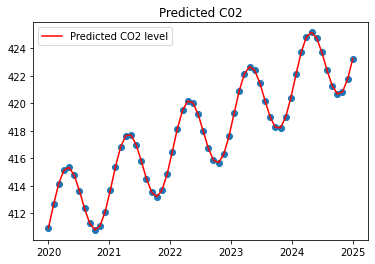

In [ ]:
# the quadratic plus sine model seems to be the closest good fit.

x_predic = np.linspace(2020,2025, 5*12) # monthly predictions
y_predic = quadsine(x_predic, *qsinpars)

# print(x_predic, y_predic)

plt.scatter(x_predic, y_predic)
plt.plot(x_predic, quadsine(x_predic, *qsinpars), color='red', label='Predicted CO2 level')
plt.title('Predicted C02')
plt.legend()